# Assignment: Evaluating Data from a Form

A client has been testing a [small form](index.html) to gather some basic data about their client-base. They have brought their findings to you to validate the data they have gathered. You can open the `index.html` page in a browser to take a look at the form.

You have been provided a [dataset of csv records](../../data/form.csv) that contain entries from the form as well as some basic visualizations.The client pointed out that some of the visualizations look incorrect but they're unsure about how to resolve them. You can explore it in the [assignment notebook](assignment.ipynb).

## Instructions

Use the techniques in this lesson to make recommendations about the form so it captures accurate and consistent information. 

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

#Loading the dataset
path = '../../data/form.csv'
form_df = pd.read_csv(path)
print(form_df)

  birth_month       state   pet
0     January         NaN  Cats
1         JAN          CA  Cats
2        Sept      Hawaii   Dog
3     january          AK   Dog
4        July          RI  Cats
5   September  California  Cats
6       April          CA   Dog
7     January  California  Cats
8    November          FL   Dog
9    December     Florida  Cats


Let us start with filling the NaN values in the 'state' column. We will replace this with the mode of the column.

In [34]:
form_df['state'].fillna('CA', inplace=True)

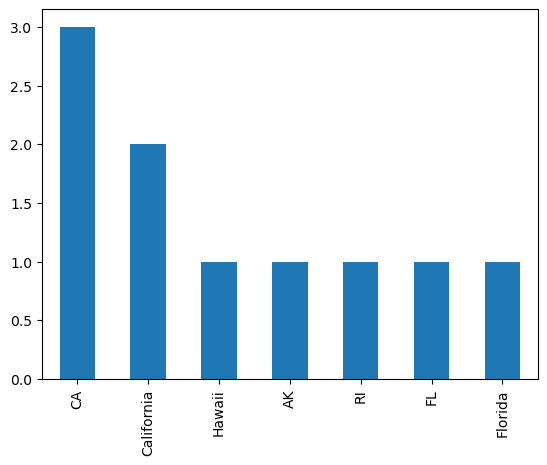

In [35]:
form_df['state'].value_counts().plot(kind='bar');
plt.show()

The 'state' column has both full names and abbrivation. We need to convert the full names to abbrivations to be consistent with the other data.

We can do this using **replace()** and a **dictonary** of the state names and abbrivations. 

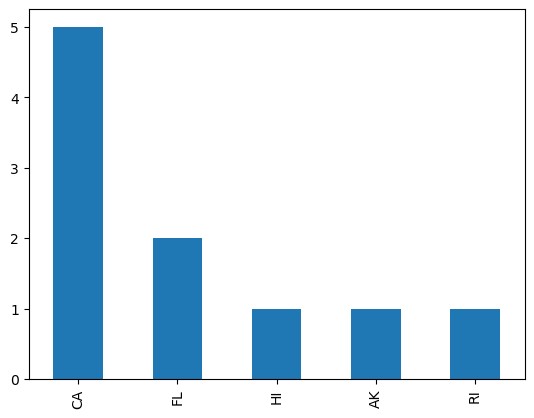

In [36]:
state_abbri = {'California': 'CA', 'Florida': 'FL', 'Hawaii': 'HI'}

form_df['state'] = form_df['state'].replace(state_abbri)

form_df['state'].value_counts().plot(kind='bar');
plt.show()

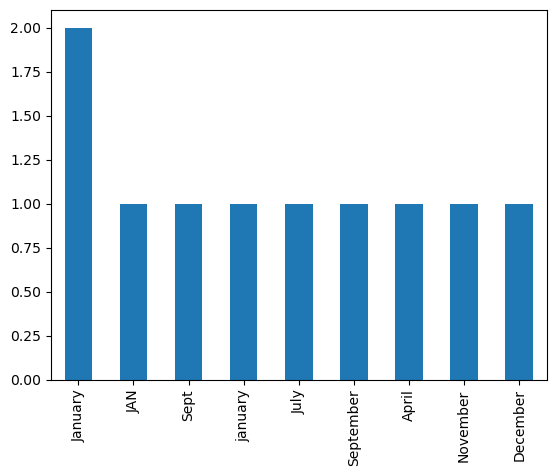

In [37]:
form_df['birth_month'].value_counts().plot(kind='bar');
plt.show()

The 'birth_month' column has a mix of abbreviations, full names, large and lowercase letters etc. 

To fix this we will change create a dictionary and use the replace() function again.

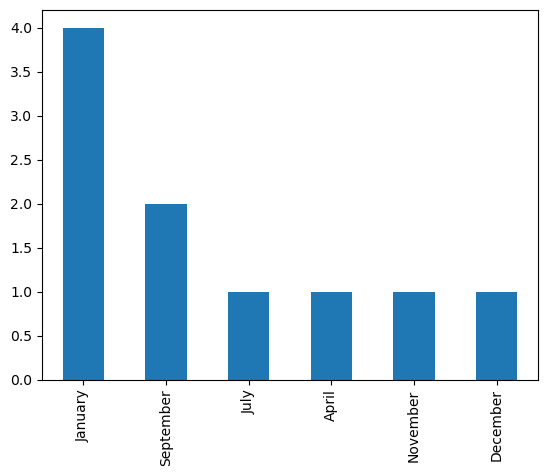

In [30]:
month = {'JAN': 'January', 'january': 'January', 'Sept': 'September'}

form_df['birth_month'] = form_df['birth_month'].replace(month)

form_df['birth_month'].value_counts().plot(kind='bar');
plt.show()

In [38]:
form_df['birth_month'] = pd.to_datetime(form_df['birth_month'], errors='coerce').dt.strftime('%B')

form_df


,birth_month,state,pet
0,NaN,CA,Cats
1,NaN,CA,Cats
2,NaN,HI,Dog
3,NaN,AK,Dog
4,NaN,RI,Cats
5,NaN,CA,Cats
6,NaN,CA,Dog
7,NaN,CA,Cats
8,NaN,FL,Dog
9,NaN,FL,Cats
